In [61]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## Pair Programming Ajuste


Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:


- Realizar el ajuste o ajustes de los modelos

- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [62]:
df = pd.read_pickle('../datos/Invistico_Airline_v3.pkl')
df.head(3)


,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,1,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,1,0,2,1,2,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852
2,1,1,2,1,1,0,0,3,2,0,2,3,3,4,4,4,2,0.0,-1.041667,0.179747


# Realización del modelo con variables codificadas y estandarizadas

## Separamos los datos

In [63]:
# X variables predictoras, y variable respuesta
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [64]:
X1.head(1)

,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844


In [65]:
df.dtypes

satisfaction                            int64
gender                               category
customer_type                        category
type_of_travel                       category
class                                   int64
seat_comfort                         category
departure/arrival_time_convenient    category
gate_location                        category
inflight_wifi_service                category
inflight_entertainment               category
online_support                       category
on-board_service                     category
leg_room_service                     category
baggage_handling                     category
checkin_service                      category
cleanliness                          category
online_boarding                      category
arrival_delay_in_minutes               object
age                                   float64
flight_distance                       float64
dtype: object

In [66]:
lista_categorias= list(df.select_dtypes(exclude=np.number).columns)

In [67]:
df.loc[145]

satisfaction                                                                         1
gender                                                                               1
customer_type                                                                        2
type_of_travel                                                                       1
class                                                                                1
seat_comfort                                                                         0
departure/arrival_time_convenient                                                    2
gate_location                                                                        4
inflight_wifi_service                                                                5
inflight_entertainment                                                               0
online_support                                                                       5
on-board_service                           

In [68]:
df.drop(145, axis=0, inplace=True)

In [69]:
df.reset_index(inplace=True, drop=True)

In [70]:
df.index

RangeIndex(start=0, stop=129879, step=1)

In [71]:
lista_categorias

['gender',
 'customer_type',
 'type_of_travel',
 'seat_comfort',
 'departure/arrival_time_convenient',
 'gate_location',
 'inflight_wifi_service',
 'inflight_entertainment',
 'online_support',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'online_boarding',
 'arrival_delay_in_minutes']

In [72]:
type(lista_categorias)

list

In [73]:
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
type_of_travel                       0
class                                0
seat_comfort                         0
departure/arrival_time_convenient    0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
arrival_delay_in_minutes             0
age                                  0
flight_distance                      0
dtype: int64

In [74]:
y1.head(1)

0    1
Name: satisfaction, dtype: int64

In [75]:
X1.drop("arrival_delay_in_minutes", axis=1, inplace=True)

In [76]:
#hacemos los grupos de entrenamiento y prueba

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [77]:
type(x_train1)

pandas.core.frame.DataFrame

In [78]:
type(y_train1)

pandas.core.series.Series

## Ajuste y predicción del modelo

In [79]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression()

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [80]:
# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [81]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
21413,1,1,Train
7284,0,0,Train
86080,0,1,Train
59842,0,0,Train
69486,0,0,Train


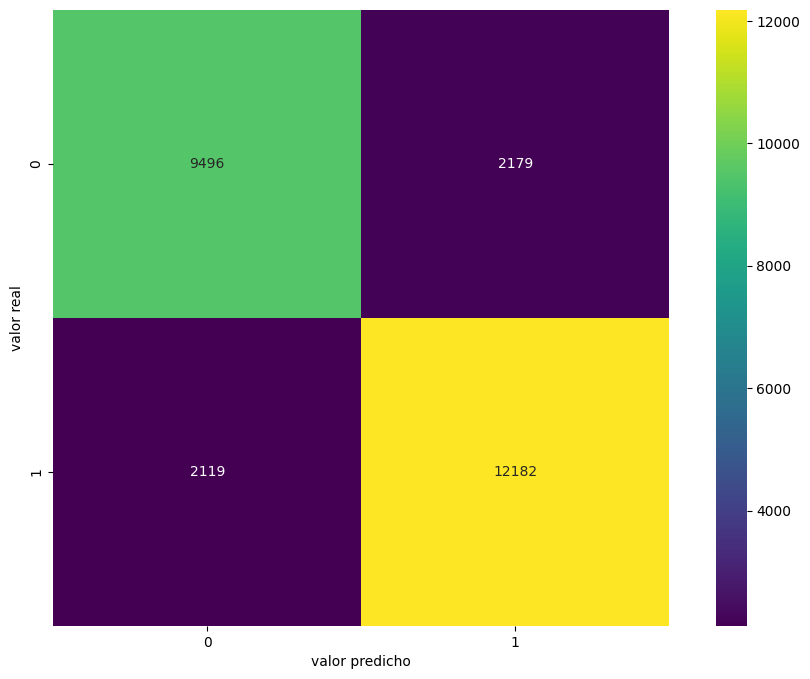

In [82]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

# Comentamos las métricas
 - Kappa: train:0.66, test:0.66 lo cual nos indica una concordancia buena.
 - accuracy: es de 0.84 lo cual nos indica un buen rendimiento del modelo en aciertos
 - precision: 0.84(test) 0.84(train) nos indica la proporción de verdaderos positivos
 - recall: mide la proporción de verdaderos positivos un alto recall indica que hay falsos negativos train(0.84), test (0.85)
 - f1: es una media combinada de precisión y recall calculada, es decir, refleja la media armónica.

 Nuestra variable respuesta se divide en:

0: los pasajeros no estan satisfechos con el servicio
1: los pasajeros estan satisfechos con el servicio
en este contexto:

-  Verdadero negativo: el número 9496 indica que nuestro modelo ha predicho 9496 usuarios que estan no satisfechos con el servicio y en realidad no están contentos.

- Verdadero positivo: el numero 12182, indica que nuestro modelo ha predicho 12182 pasajeros que están satisfechos con el servicio y que en realidad sí están satisfechos.

- Falso negativo: el número 2119(abajo a la izquierda) indica que nuestro modelo esá prediciendo que 2119 usuarios no están satisfechos cuando en realiadad sí están satisfechos.

- Falso positivo: el número 2179 indica que nuestro modelo está prediciendo que 2179 estan satisfechos cuando en realidad no lo están.